In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

## Répliement du spectre 

In [2]:
T = 10
N = 20
dt = T/N
t = np.arange(N)*dt
print("Sample rate", 1/dt)

t_big = np.linspace(0, T, 10000)

Sample rate 2.0


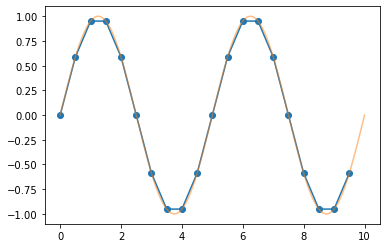

In [3]:
freq = .2
signal = np.sin(2*pi*freq*t)
plt.plot(t, signal, '-o')
signal_big = np.sin(2*pi*freq*t_big)
plt.plot(t_big, signal_big, alpha=.5)


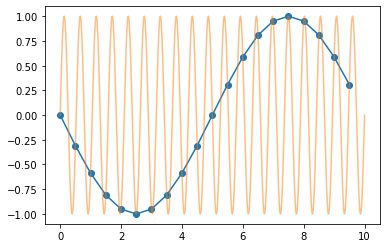

In [9]:
freq = 1.9
signal = np.sin(2*pi*freq*t)
plt.plot(t, signal, '-o')
signal_big = np.sin(2*pi*freq*t_big)
plt.plot(t_big, signal_big, alpha=.5)


# Fenetrage

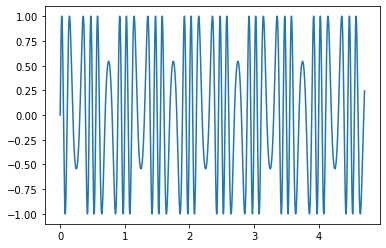

In [17]:
N = 20000
#N = 5000
dx = 0.000235467432
x = np.arange(N)*dx

y = np.sin(10*np.sin(2*np.pi*x))

plt.plot(x, y)

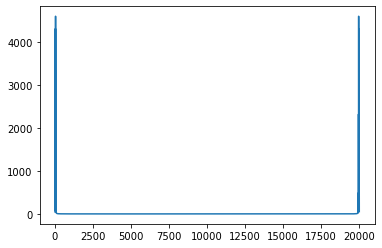

In [18]:
ytilde = np.fft.fft(y)
plt.plot(np.abs(ytilde))

Text(0.5, 0, 'Frequence')

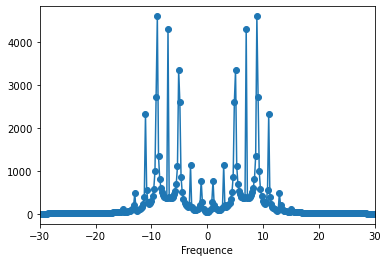

In [19]:
freq = np.fft.fftfreq(N, dx)
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(np.abs(ytilde)), '-o')
plt.xlim(-30, 30)
plt.xlabel('Frequence')

Fenêtre

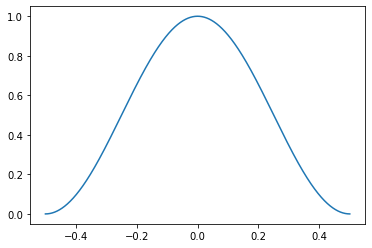

In [22]:
x = np.linspace(-.5, .5, N, endpoint=False)
fenetre = .5+.5*np.cos(2*np.pi*x)
plt.plot(x, fenetre)

(1e-09, 550603434.2672509)

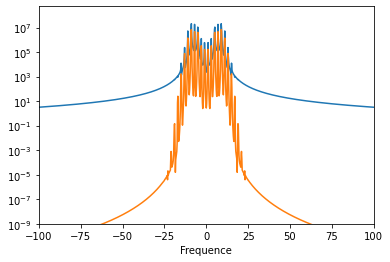

In [24]:
freq = np.fft.fftfreq(N, dx)
ytilde_fen = np.fft.fft(y*fenetre)
plt.semilogy(np.fft.fftshift(freq), np.fft.fftshift(np.abs(ytilde))**2, '-')
plt.semilogy(np.fft.fftshift(freq), np.fft.fftshift(np.abs(ytilde_fen))**2, '-')

plt.xlim(-100, 100)
plt.xlabel('Frequence')
plt.ylim(1e-9, None)

## Filtres

In [25]:
from numpy.fft import fft, ifft, fftfreq

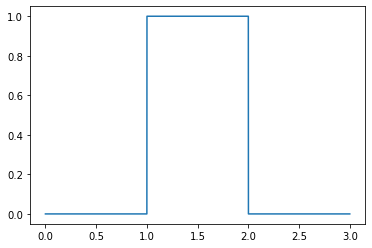

In [27]:
samplerate = 10000
delta_t = 1/samplerate

T = 3
N = T*samplerate


signal = np.zeros(N)
signal[10000:20000] = 1
t = np.arange(len(signal))*delta_t
plt.plot(t, signal)

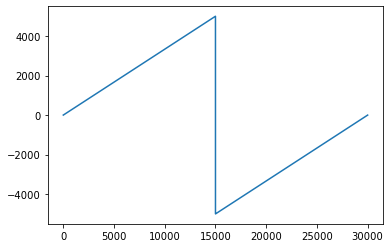

In [28]:
freqs = fftfreq(len(signal), 1/samplerate)
plt.plot(freqs)

Non causal : 
$$ H(\omega) = \frac{1}{1+(\omega \tau)^2} $$

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


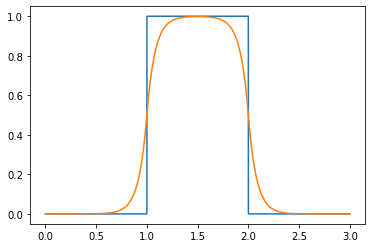

In [29]:
# Filtre passe bas
tau = .2

signal_tilde = fft(signal)
freqs = fftfreq(len(signal), 1/samplerate)
H = 1/(1+(2*pi*(freqs*tau)**2))
signal_2 = ifft(H*signal_tilde)


plt.plot(t, signal)
plt.plot(t, signal_2)

Filtre causal : 
$$ H(\omega) = \frac{1}{1+i(\omega \tau)} $$

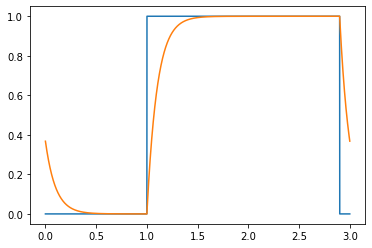

In [38]:
signal = np.zeros(N)
signal[10000:20000] = 1
signal[19000:29000] = 1


signal_tilde = np.fft.rfft(signal)
freqs = np.fft.rfftfreq(len(signal), 1/samplerate)
H = 1/(1+1J*(freqs*tau*2*np.pi))
signal_2 = np.fft.irfft(H*signal_tilde)


plt.plot(t, signal)
plt.plot(t, signal_2)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


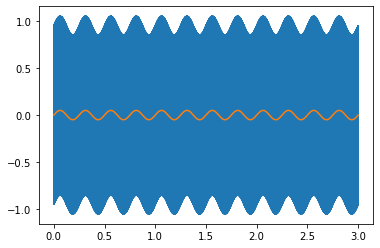

In [34]:
# Exemple 
signal = np.sin(2*pi*1000*t) + 0.1*np.sin(2*pi*4*t)

plt.plot(t, signal)

tau = .1

signal_tilde = fft(signal)
freqs = fftfreq(len(signal), 1/samplerate)
H = 1/(1+1J*(2*pi*(freqs*tau)**2))
signal_2 = ifft(H*signal_tilde)

plt.plot(t, signal_2)


## Filtre sur une image

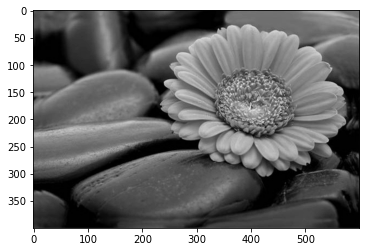

In [35]:
from matplotlib.image import imread

image = imread('marguerite.jpg')
plt.imshow(image, cmap='gray')

In [36]:
from numpy.fft import fft2, ifft2, fftfreq

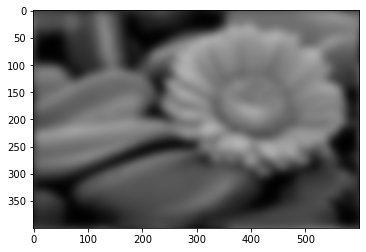

In [37]:
image_tilde = fft2(image)

Delta_x = 50

freq_x = fftfreq(image.shape[0])
freq_y = fftfreq(image.shape[1])
freq_square = freq_x[:, np.newaxis]**2 + freq_y[np.newaxis,:]**2
filtre = np.exp(-freq_square*Delta_x**2/2)

image2_tilde = image_tilde*filtre
image2 = np.real(ifft2(image2_tilde))
plt.imshow(image2, cmap='gray', vmin=0, vmax=256)